### 1. What we do
+ Batch Gradient Descent
+ Mini-batch Gradient Descent
+ Momentum Gradient Descent
+ Adam

### 2. import libs

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import math
import sklearn
import sklearn.datasets

import opt_utils
import testCase

# set parameters of pyplot
plt.rcParams['figure.figsize'] = (7.0,4.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

### 3.Gradient Descent
#### 3.1 Batch Gradient Descent

In [22]:
def update_params_with_gd(params,grads,learning_rate):
    layer_num = len(params) // 2
    for i in range(1,layer_num+1):
        params["W"+str(i)] = params["W"+str(i)] - learning_rate*grads["dW"+str(i)]
        params["b"+str(i)] = params["b"+str(i)] - learning_rate*grads["db"+str(i)]
    return params

Test function update_params_with_gd:

In [6]:
print("=====Test uodate_params_with_gd=======")
params,grads,learning_rate = testCase.update_parameters_with_gd_test_case()
params = update_params_with_gd(params,grads,learning_rate)
print("W1 = "+str(params["W1"]))
print("b1 = "+str(params["b1"]))
print("W2 = "+str(params["W2"]))
print("b2 = "+str(params["b2"]))

=====Test uodate_params_with_gd=======
W1 = [[ 1.63535156 -0.62320365 -0.53718766]
 [-1.07799357  0.85639907 -2.29470142]]
b1 = [[ 1.74604067]
 [-0.75184921]]
W2 = [[ 0.32171798 -0.25467393  1.46902454]
 [-2.05617317 -0.31554548 -0.3756023 ]
 [ 1.1404819  -1.09976462 -0.1612551 ]]
b2 = [[-0.88020257]
 [ 0.02561572]
 [ 0.57539477]]


#### 3.2 Turn data into mini-batches

In [20]:
def random_mini_batches(X,Y,mini_batch_size=64,seed=0):
    np.random.seed(seed)
    m = X.shape[1]
    mini_batches=[]
    
    # Mess the original data
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:,permutation]
    shuffled_Y = Y[:,permutation].reshape((1,m))
    
    # Separate
    num_complete_minibatches = math.floor(m/mini_batch_size)
    for i in range(num_complete_minibatches):
        mini_batch_X = shuffled_X[:,i*mini_batch_size:(i+1)*mini_batch_size]
        mini_batch_Y = shuffled_Y[:,i*mini_batch_size:(i+1)*mini_batch_size]
        
        mini_batch = (mini_batch_X,mini_batch_Y)
        mini_batches.append(mini_batch)
    if (m%mini_batch_size!=0):
        mini_batch_X = shuffled_X[:,(num_complete_minibatches)*mini_batch_size:]
        mini_batch_Y = shuffled_Y[:,(num_complete_minibatches)*mini_batch_size:]
        mini_batch = (mini_batch_X,mini_batch_Y)
        mini_batches.append(mini_batch)
    return mini_batches
    
    

Test random_mini_batches:

In [21]:
print("=====Test random_mini_batches=========")
X_case,Y_case,mini_batch_size = testCase.random_mini_batches_test_case()
mini_batches = random_mini_batches(X_case,Y_case,mini_batch_size)

print("first mini_batch_X size:"+str(mini_batches[0][0].shape))
print("first mini_batch_Y size:"+str(mini_batches[0][1].shape))
print("second mini_batch_X size:"+str(mini_batches[1][0].shape))
print("second mini_batch_Y size:"+str(mini_batches[1][1].shape))
print("third mini_batch_X size:"+str(mini_batches[2][0].shape))
print("third mini_batch_Y size:"+str(mini_batches[2][1].shape))

=====Test random_mini_batches=========
first mini_batch_X size:(12288, 64)
first mini_batch_Y size:(1, 64)
second mini_batch_X size:(12288, 64)
second mini_batch_Y size:(1, 64)
third mini_batch_X size:(12288, 20)
third mini_batch_Y size:(1, 20)


#### 3.3 Momentum Gradient Descent

initialize velocity (Vdw, Vdb)

In [1]:
def init_velocity(params):
    v = {}
    layer_num = len(params) // 2
    for i in range(1,layer_num+1):
        v["dW"+str(i)] = np.zeros(params["W"+str(i)].shape)
        v["db"+str(i)] = np.zeros(params["b"+str(i)].shape)
    return v

Test init_velocity:

In [4]:
print("===========Test init_velocity===========")
params = testCase.initialize_velocity_test_case()
v = init_velocity(params)
print("v[dW1] = "+str(v["dW1"]))
print("v[db1] = "+str(v["db1"]))
print("v[dW2] = "+str(v["dW2"]))
print("v[db2] = "+str(v["db2"]))

===========Test init_velocity===========
v[dW1] = [[0. 0. 0.]
 [0. 0. 0.]]
v[db1] = [[0.]
 [0.]]
v[dW2] = [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
v[db2] = [[0.]
 [0.]
 [0.]]


upgrade parameters with momentum

In [9]:
def update_params_with_momentum(params,grads,v,beta,learning_rate):
    layer_num = len(params) // 2
    for i in range(1,layer_num+1):
        v["dW"+str(i)] = beta*v["dW"+str(i)]+(1-beta)*grads["dW"+str(i)]
        v["db"+str(i)] = beta*v["db"+str(i)]+(1-beta)*grads["db"+str(i)]
        params["W"+str(i)] = params["W"+str(i)]-learning_rate*v["dW"+str(i)]
        params["b"+str(i)] = params["b"+str(i)]-learning_rate*v["db"+str(i)]
    return params,v

Test update_params_with_momentum

In [10]:
print("=====Test update_params_with_momentum=====")
params,grads,v = testCase.update_parameters_with_momentum_test_case()
params,v = update_params_with_momentum(params,grads,v,beta=0.9,learning_rate=0.01)
print("W1 = "+str(params["W1"]))
print("b1 = "+str(params["b1"]))
print("W2 = "+str(params["W2"]))
print("b2 = "+str(params["b2"]))
print("v[dW1] = "+str(v["dW1"]))
print("v[db1] = "+str(v["db1"]))
print("v[dW2] = "+str(v["dW2"]))
print("v[db2] = "+str(v["db2"]))

=====Test update_params_with_momentum=====
W1 = [[ 1.62544598 -0.61290114 -0.52907334]
 [-1.07347112  0.86450677 -2.30085497]]
b1 = [[ 1.74493465]
 [-0.76027113]]
W2 = [[ 0.31930698 -0.24990073  1.4627996 ]
 [-2.05974396 -0.32173003 -0.38320915]
 [ 1.13444069 -1.0998786  -0.1713109 ]]
b2 = [[-0.87809283]
 [ 0.04055394]
 [ 0.58207317]]
v[dW1] = [[-0.11006192  0.11447237  0.09015907]
 [ 0.05024943  0.09008559 -0.06837279]]
v[db1] = [[-0.01228902]
 [-0.09357694]]
v[dW2] = [[-0.02678881  0.05303555 -0.06916608]
 [-0.03967535 -0.06871727 -0.08452056]
 [-0.06712461 -0.00126646 -0.11173103]]
v[db2] = [[0.02344157]
 [0.16598022]
 [0.07420442]]


#### 3.4 Adam Gradient Descent

initialize v,s:

In [11]:
def init_adam(params):
    layer_num = len(params) // 2
    v = {}
    s = {}
    for i in range(1,layer_num+1):
        v["dW"+str(i)]=np.zeros(params["W"+str(i)].shape)
        v["db"+str(i)]=np.zeros(params["b"+str(i)].shape)
        s["dW"+str(i)]=np.zeros(params["W"+str(i)].shape)
        s["db"+str(i)]=np.zeros(params["b"+str(i)].shape)
    return v,s

Test init_adam

In [12]:
print("=====Test init_adam=====")
params = testCase.initialize_adam_test_case()
v,s = init_adam(params)
print("v[dW1] = "+str(v["dW1"]))
print("v[db1] = "+str(v["db1"]))
print("v[dW2] = "+str(v["dW2"]))
print("v[db2] = "+str(v["db2"]))
print("s[dW1] = "+str(s["dW1"]))
print("s[db1] = "+str(s["db1"]))
print("s[dW2] = "+str(s["dW2"]))
print("s[db2] = "+str(s["db2"]))

=====Test init_adam=====
v[dW1] = [[0. 0. 0.]
 [0. 0. 0.]]
v[db1] = [[0.]
 [0.]]
v[dW2] = [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
v[db2] = [[0.]
 [0.]
 [0.]]
s[dW1] = [[0. 0. 0.]
 [0. 0. 0.]]
s[db1] = [[0.]
 [0.]]
s[dW2] = [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
s[db2] = [[0.]
 [0.]
 [0.]]


upgrade parameters using adam momentum

In [16]:
def update_params_with_adam(params,grads,v,s,t,learning_rate=0.01,beta1=0.9,beta2=0.999,epsilon=1e-8):
    layer_num = len(params) // 2
    v_corrected = {}
    s_corrected = {}
    for i in range(1,layer_num+1):
        v["dW"+str(i)]=beta1*v["dW"+str(i)]+(1-beta1)*grads["dW"+str(i)]
        v["db"+str(i)]=beta1*v["db"+str(i)]+(1-beta1)*grads["db"+str(i)]
        s["dW"+str(i)]=beta2*s["dW"+str(i)]+(1-beta2)*np.multiply(grads["dW"+str(i)],grads["dW"+str(i)])
        s["db"+str(i)]=beta2*s["db"+str(i)]+(1-beta2)*np.multiply(grads["db"+str(i)],grads["db"+str(i)])
        
        v_corrected["dW"+str(i)]=v["dW"+str(i)]/(1-np.power(beta1,t))
        v_corrected["db"+str(i)]=v["db"+str(i)]/(1-np.power(beta1,t))
        s_corrected["dW"+str(i)]=s["dW"+str(i)]/(1-np.power(beta2,t))
        s_corrected["db"+str(i)]=s["db"+str(i)]/(1-np.power(beta2,t))
        
        params["W"+str(i)]=params["W"+str(i)]-learning_rate*v_corrected["dW"+str(i)]/np.sqrt(s_corrected["dW"+str(i)]+epsilon)
        params["b"+str(i)]=params["b"+str(i)]-learning_rate*v_corrected["db"+str(i)]/np.sqrt(s_corrected["db"+str(i)]+epsilon)
        
    return params,v,s

Test update_params_with_adam

In [17]:
print("=====Test update_params_with_adam=====")
params,grads,v,s = testCase.update_parameters_with_adam_test_case()
print(params["b1"].shape)
params,v,s = update_params_with_adam(params,grads,v,s,t=2)
print("W1 = "+str(params["W1"]))
print("b1 = "+str(params["b1"]))
print("W2 = "+str(params["W2"]))
print("b2 = "+str(params["b2"]))
print("v[dW1] = "+str(v["dW1"]))
print("v[db1] = "+str(v["db1"]))
print("v[dW2] = "+str(v["dW2"]))
print("v[db2] = "+str(v["db2"]))
print("s[dW1] = "+str(s["dW1"]))
print("s[db1] = "+str(s["db1"]))
print("s[dW2] = "+str(s["dW2"]))
print("s[db2] = "+str(s["db2"]))

=====Test update_params_with_adam=====
(2, 1)
W1 = [[ 1.63178673 -0.61919778 -0.53561312]
 [-1.08040999  0.85796626 -2.29409733]]
b1 = [[ 1.75225313]
 [-0.75376553]]
W2 = [[ 0.32648046 -0.25681174  1.46954931]
 [-2.05269934 -0.31497584 -0.37661299]
 [ 1.14121081 -1.09245036 -0.16498684]]
b2 = [[-0.88529978]
 [ 0.03477238]
 [ 0.57537385]]
v[dW1] = [[-0.11006192  0.11447237  0.09015907]
 [ 0.05024943  0.09008559 -0.06837279]]
v[db1] = [[-0.01228902]
 [-0.09357694]]
v[dW2] = [[-0.02678881  0.05303555 -0.06916608]
 [-0.03967535 -0.06871727 -0.08452056]
 [-0.06712461 -0.00126646 -0.11173103]]
v[db2] = [[0.02344157]
 [0.16598022]
 [0.07420442]]
s[dW1] = [[0.00121136 0.00131039 0.00081287]
 [0.0002525  0.00081154 0.00046748]]
s[db1] = [[1.51020075e-05]
 [8.75664434e-04]]
s[dW2] = [[7.17640232e-05 2.81276921e-04 4.78394595e-04]
 [1.57413361e-04 4.72206320e-04 7.14372576e-04]
 [4.50571368e-04 1.60392066e-07 1.24838242e-03]]
s[db2] = [[5.49507194e-05]
 [2.75494327e-03]
 [5.50629536e-04]]


### 4.Test

#### 4.1 Load Dataset

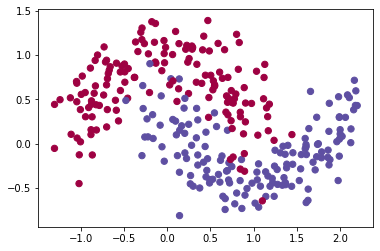

In [18]:
train_X,train_Y = opt_utils.load_dataset(is_plot=True)

#### 4.2 Define the model

In [36]:
def model(X,Y,layer_dims,optimizer,learning_rate=0.0007,
          mini_batch_size=64,beta=0.9,beta1=0.9,beta2=0.999,
          epsilon=1e-8,num_epochs=10000,print_cost=True,is_plot=True):
    L = len(layer_dims)
    costs = []
    t = 0
    seed = 10
    
    params = opt_utils.initialize_parameters(layer_dims)
    
    # choose optimization method
    if optimizer == "gd":
        pass
    elif optimizer == "momentum":
        v = init_velocity(params)
    elif optimizer == "adam":
        v,s = init_adam(params)
    else:
        print("Wrong optimizer parameter")
        exit(1)
    
    # Learning
    for i in range(num_epochs):
        seed = seed + 1
        mini_batches = random_mini_batches(X,Y,mini_batch_size,seed)
        
        for mini_batch in mini_batches:
            (mini_batch_X,mini_batch_Y) = mini_batch
            
            # fp
            A3,cache = opt_utils.forward_propagation(mini_batch_X,params)
            
            # compute cost
            cost = opt_utils.compute_cost(A3,mini_batch_Y)
            
            # bp
            grads = opt_utils.backward_propagation(mini_batch_X,mini_batch_Y,cache)
            
            # upgrade params
            
            if optimizer == "gd":
                params = update_params_with_gd(params,grads,learning_rate)
            elif optimizer == "momentum":
                params,v = update_params_with_momentum(params,grads,v,beta,learning_rate)
            elif optimizer == "adam":
                t = t + 1
                params,v,s = update_params_with_adam(params,grads,v,s,t,learning_rate,beta1,beta2,epsilon)
        if i%100==0:
            costs.append(cost)
            if print_cost and i%1000==0:
                print("Epoch "+str(i)+" Cost:"+str(cost))
    if is_plot:
        plt.plot(costs)
        plt.ylabel("cost")
        plt.xlabel("#epochs")
        plt.title("Learning rate = "+str(learning_rate))
        plt.show()
    return params


Test model using **common gradient descent**

Epoch 0 Cost:0.690735512291113
Epoch 1000 Cost:0.6852725328458241
Epoch 2000 Cost:0.6470722240719003
Epoch 3000 Cost:0.6195245549970403
Epoch 4000 Cost:0.5765844355950944
Epoch 5000 Cost:0.6072426395968576
Epoch 6000 Cost:0.5294033317684576
Epoch 7000 Cost:0.46076823985930115
Epoch 8000 Cost:0.465586082399045
Epoch 9000 Cost:0.46451797221676844


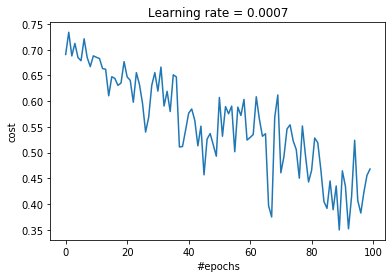

In [27]:
layer_dims = [train_X.shape[0],5,2,1]
params = model(train_X,train_Y,layer_dims,optimizer="gd",is_plot=True)

Accuracy: 0.7966666666666666


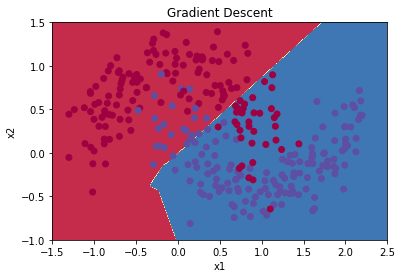

In [28]:
predictions = opt_utils.predict(train_X,train_Y,params)

plt.title("Gradient Descent")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
opt_utils.plot_decision_boundary(lambda x:opt_utils.predict_dec(params,x.T),train_X,np.squeeze(train_Y))

Test model using **momentum gradient descent**

Epoch 0 Cost:0.6907412988351506
Epoch 1000 Cost:0.6853405261267578
Epoch 2000 Cost:0.6471448370095255
Epoch 3000 Cost:0.6195943032076022
Epoch 4000 Cost:0.5766650344073023
Epoch 5000 Cost:0.607323821900647
Epoch 6000 Cost:0.5294761758786996
Epoch 7000 Cost:0.46093619004872366
Epoch 8000 Cost:0.465780093701272
Epoch 9000 Cost:0.4647395967922748


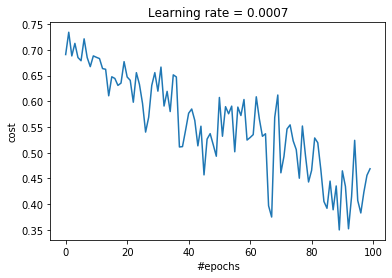

In [29]:
layer_dims = [train_X.shape[0],5,2,1]

params = model(train_X,train_Y,layer_dims,beta=0.9,optimizer="momentum",is_plot=True)


Accuracy: 0.7966666666666666


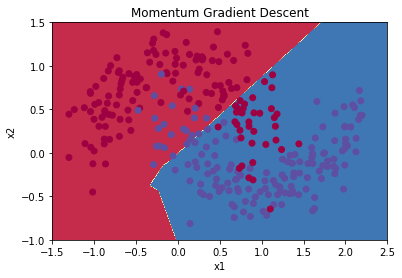

In [30]:
predictions = opt_utils.predict(train_X,train_Y,params)

plt.title("Momentum Gradient Descent")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
opt_utils.plot_decision_boundary(lambda x:opt_utils.predict_dec(params,x.T),train_X,np.squeeze(train_Y))

Test model using **Adam Gradient Descent**

Epoch 0 Cost:0.6905522446113365
Epoch 1000 Cost:0.18550136438550574
Epoch 2000 Cost:0.1508304657525321
Epoch 3000 Cost:0.07445438570997177
Epoch 4000 Cost:0.12595915651337158
Epoch 5000 Cost:0.10434443534245491
Epoch 6000 Cost:0.10067637504120655
Epoch 7000 Cost:0.03165203013511561
Epoch 8000 Cost:0.11197273131244202
Epoch 9000 Cost:0.1979400715246549


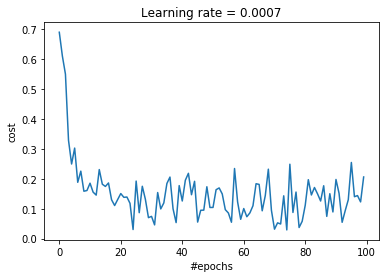

In [37]:
layer_dims = [train_X.shape[0],5,2,1]

params = model(train_X,train_Y,layer_dims,optimizer="adam",is_plot=True)


Accuracy: 0.94


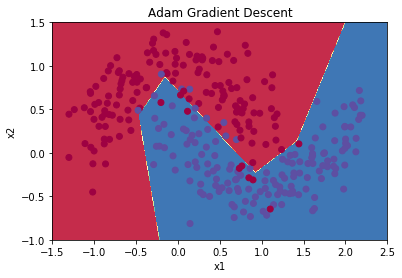

In [38]:
predictions = opt_utils.predict(train_X,train_Y,params)

plt.title("Adam Gradient Descent")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
opt_utils.plot_decision_boundary(lambda x:opt_utils.predict_dec(params,x.T),train_X,np.squeeze(train_Y))